In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, 
    mean_absolute_error, mean_squared_error, r2_score
)
import xgboost as xgb


In [2]:
def load_data(folder):
    data = []
    labels = []
    for label, category in enumerate(["healthy", "unhealthy"]):
        path = os.path.join(folder, category)
        for file in os.listdir(path):
            img_path = os.path.join(path, file)
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.resize(image, (128, 128))  # Resize to 128x128
                data.append(image.flatten())  # Flatten the image
                labels.append(label)
    return np.array(data), np.array(labels)

train_folder = r"D:\AI Algorithm\cucumber\train"
test_folder = r"D:\AI Algorithm\cucumber\test"
val_folder = r"D:\AI Algorithm\cucumber\validation"

X_train, y_train = load_data(train_folder)
X_test, y_test = load_data(test_folder)
X_val, y_val = load_data(val_folder)


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0


In [4]:
model = xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric="logloss"
)


In [6]:
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)


[0]	validation_0-logloss:0.55492
[1]	validation_0-logloss:0.52632
[2]	validation_0-logloss:0.49747
[3]	validation_0-logloss:0.47367
[4]	validation_0-logloss:0.45917
[5]	validation_0-logloss:0.44389
[6]	validation_0-logloss:0.42839
[7]	validation_0-logloss:0.41892
[8]	validation_0-logloss:0.40667
[9]	validation_0-logloss:0.39269
[10]	validation_0-logloss:0.38018
[11]	validation_0-logloss:0.36791
[12]	validation_0-logloss:0.35796
[13]	validation_0-logloss:0.34573
[14]	validation_0-logloss:0.33942
[15]	validation_0-logloss:0.32778
[16]	validation_0-logloss:0.31957
[17]	validation_0-logloss:0.31362
[18]	validation_0-logloss:0.30510
[19]	validation_0-logloss:0.30130
[20]	validation_0-logloss:0.29322
[21]	validation_0-logloss:0.28862
[22]	validation_0-logloss:0.28511
[23]	validation_0-logloss:0.27758
[24]	validation_0-logloss:0.27237
[25]	validation_0-logloss:0.26886
[26]	validation_0-logloss:0.26529
[27]	validation_0-logloss:0.26215
[28]	validation_0-logloss:0.26105
[29]	validation_0-loglos

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [7]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


In [8]:
# Accuracy, Precision, Recall, F1
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC
auc = roc_auc_score(y_test, y_prob)

# Error Metrics
mae = mean_absolute_error(y_test, y_prob)
mse = mean_squared_error(y_test, y_prob)
rmse = np.sqrt(mse)

# Percentage Errors
mape = np.mean(np.abs((y_test - y_prob) / y_test)) * 100
smape = 100 / len(y_test) * np.sum(2 * np.abs(y_test - y_prob) / (np.abs(y_test) + np.abs(y_prob)))

# R2 Score and Explained Variance
r2 = r2_score(y_test, y_prob)
explained_variance = 1 - np.var(y_test - y_prob) / np.var(y_test)

# Mean Bias Deviation
mbd = np.mean(y_test - y_prob)

# Print Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Bias Deviation (MBD): {mbd:.2f}")


Accuracy: 0.91
Precision: 0.91
Recall: 0.96
F1-Score: 0.94
AUC: 0.96
Confusion Matrix:
[[ 51  15]
 [  7 159]]
Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.26
Mean Absolute Percentage Error (MAPE): inf
Symmetric Mean Absolute Percentage Error (SMAPE): 63.08
Explained Variance Score: 0.67
R^2 Score: 0.67
Mean Bias Deviation (MBD): -0.03


C:\Users\Anurag\AppData\Local\Temp\ipykernel_15772\443415546.py:19: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_prob) / y_test)) * 100


In [9]:
model.save_model("xgboost_cucumber_leaf.model")


C:\Users\Anurag\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:27:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


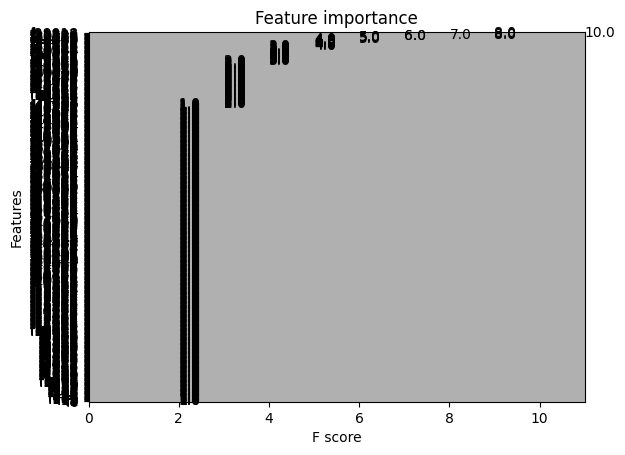

In [10]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()
